# IBM "Applied Data Science Capstone" course
# (Week 3, Task 1)

(Written by: D. Espinosa, Current date: 2020-11-04).

This notebook contains all the weekly activities required to complete and pass the IBM "Applied Data Science Capstone" course, the last of "IBM Data Science" Professional Certificate. Each section contains the corresponding week's assignment. Please notice that this notebook will be continuosly updated, until explicitely state it as "Final Version".

## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
* [Week 3, Task 1 (Segmenting and Clustering Neighborhoods in Toronto) - Description](#week3p1_1)
* [Week 3, Task 1 (Segmenting and Clustering Neighborhoods in Toronto) - Solution](#week3p1_2)

### Week 3, Task 1: <a class="anchor" id="week3p1_1"></a>
### Segmenting and Clustering Neighborhoods in Toronto - Description

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

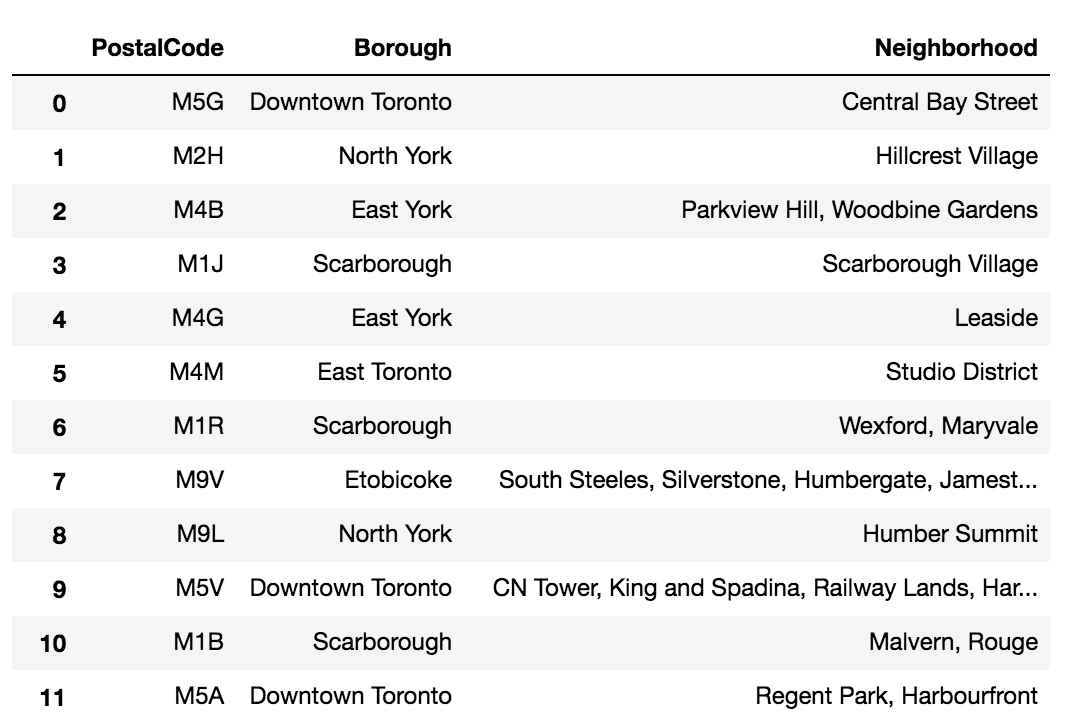

3. To create the above dataframe:

 - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
 - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
 - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
 - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
 - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
 - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.


4. Submit a link to your Notebook on your Github repository. (**10 marks**)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

### Week 3, Task 1: <a class="anchor" id="week3p1_2"></a>
### Segmenting and Clustering Neighborhoods in Toronto - Solution 

First, we need to call the needed libraries. In this case, we will scrap the given website using BeautifulSoup4. Plus, we will create an empy Dataframe to store the results of the scrapping, as follows:

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 

# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
df1 = pd.DataFrame(columns=['PostalCode','Borough','Neighborhood'])
df1

,PostalCode,Borough,Neighborhood


Now, we start the scrapping process. Following the [official documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) quick guide, the following lines will do the job of acquiring the desried table:

In [3]:
# Web scrapping & first dataframe obtained.
URL = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
r = requests.get(URL) 
soup = BeautifulSoup(r.content, 'html5lib')

for lines in soup.find_all('tr'):
    columns = lines.find_all('td')
    if len(columns) == 3:
        pc = str(columns[0]).lstrip('<td>').replace("</td>","").strip()
        bgh = str(columns[1]).lstrip('<td>').replace("</td>","").strip()
        nbh = str(columns[2]).lstrip('<td>').replace("</td>","").strip()
        if (len(pc)  < 60) & (len(bgh) < 60) & (len(nbh) < 60):
            df1 = df1.append({'PostalCode':pc,
                            'Borough':bgh,
                            'Neighborhood':nbh},ignore_index=True)

Through the following line of code, we will ignore cells with a Borough that is 'Not assigned':

In [4]:
df1 = df1[df1['Borough'] != 'Not assigned'].reset_index(drop = True)

Then, with the following line we will merge neighborhoods inside a same cell, separated by comas, if the PostalCode is equal:

In [5]:
df1 = df1.groupby(['PostalCode','Borough'])['Neighborhood'].agg(', '.join).reset_index()

Finally, we will assign the Borough name to the Neighborhood name, if the latest is equal to 'Not Assigned':

In [6]:
def check_equals(Borough,Neighborhood):
    if Neighborhood == 'Not Assigned':
        Neighborhood = Borough
    return Neighborhood   
df1['Neighborhood'] = df1.apply(lambda x:check_equals(x['Borough'], x['Neighborhood']),axis=1)
df1

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
89,M9L,North York,Humber Summit
90,M9M,North York,"Humberlea, Emery"
91,M9N,York,Weston
92,M9P,Etobicoke,Westmount


As the latest requirement of the task, we will display the shape of the resulting dataframe:

In [7]:
print('Shape after replacing Neighborhood = Borough (if Neighborhood==\'Not assigned\'):',df1.shape)

Shape after replacing Neighborhood = Borough (if Neighborhood=='Not assigned'): (94, 3)
